In [10]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import random
import math
import copy
import networkx as nx

class NeuralNetwork:
    def __init__(self,nodei,nodeh,nodeo,a,traindata,testdata,biasw1,biasw2,errort,validdata):
        self.nodeh = nodeh #number of hidden nodes
        self.nodei = nodei #number of input nodes
        self.nodeo = nodeo #number of output nodes
        self.errort = errort #tolerable error
        self.biasw1= np.full((1, self.nodeh), biasw1)
        self.w1 = np.vstack([np.random.rand(self.nodei,self.nodeh),self.biasw1])
        self.biasw2= np.full((1, self.nodeo), biasw2)
        self.w2 = np.vstack([np.random.rand(self.nodeh,self.nodeo),self.biasw2])
        self.a = a
        traindat = pd.read_csv(traindata, header=None,)
        validdat = pd.read_csv(validdata, header=None)
        testdat = pd.read_csv(testdata, header=None)
        traindat.columns = ['0','1','2','3','4']
        testdat.columns = ['0','1','2','3','4']
        validdat.columns = ['0','1','2','3','4']
        self.maxtrain = traindat.max(axis=0)
        self.mintrain = traindat.min(axis=0)
        self.maxtest = testdat.max(axis=0)
        self.mintest = testdat.min(axis=0)
        self.maxvalid = validdat.max(axis=0)
        self.minvalid = validdat.min(axis=0)
        
        #NORMALIZATION MIN-MAX
        traindat['0']=traindat['0'].apply(lambda x: (x-self.mintrain[0])/(self.maxtrain[0]-self.mintrain[0]))
        traindat['1']=traindat['1'].apply(lambda x: (x-self.mintrain[1])/(self.maxtrain[1]-self.mintrain[1]))
        traindat['2']=traindat['2'].apply(lambda x: (x-self.mintrain[2])/(self.maxtrain[2]-self.mintrain[2]))
        traindat['3']=traindat['3'].apply(lambda x: (x-self.mintrain[3])/(self.maxtrain[3]-self.mintrain[3]))
        testdat['0']=testdat['0'].apply(lambda x: (x-self.mintest[0])/(self.maxtest[0]-self.mintest[0]))
        testdat['1']=testdat['1'].apply(lambda x: (x-self.mintest[1])/(self.maxtest[1]-self.mintest[1]))
        testdat['2']=testdat['2'].apply(lambda x: (x-self.mintest[2])/(self.maxtest[2]-self.mintest[2]))
        testdat['3']=testdat['3'].apply(lambda x: (x-self.mintest[3])/(self.maxtest[3]-self.mintest[3]))
        validdat['0']=validdat['0'].apply(lambda x: (x-self.minvalid[0])/(self.maxvalid[0]-self.minvalid[0]))
        validdat['1']=validdat['1'].apply(lambda x: (x-self.minvalid[1])/(self.maxvalid[1]-self.minvalid[1]))
        validdat['2']=validdat['2'].apply(lambda x: (x-self.minvalid[2])/(self.maxvalid[2]-self.minvalid[2]))
        validdat['3']=validdat['3'].apply(lambda x: (x-self.minvalid[3])/(self.maxvalid[3]-self.minvalid[3]))
        #print(traindat)
        
        self.itraindata = traindat.values.tolist()
        self.itestdata = testdat.values.tolist()
        self.ivaliddata = validdat.values.tolist()
        
        self.itrainval = np.hstack((np.array(self.itraindata)[:,:4].astype(np.float), np.ones((np.array(self.itraindata)[:,:4].astype(np.float).shape[0], 1), dtype=np.array(self.itraindata)[:,:4].astype(np.float).dtype)))
        self.itestval = np.hstack((np.array(self.itestdata)[:,:4].astype(np.float), np.ones((np.array(self.itestdata)[:,:4].astype(np.float).shape[0], 1), dtype=np.array(self.itestdata)[:,:4].astype(np.float).dtype)))
        self.ivalidval = np.hstack((np.array(self.ivaliddata)[:,:4].astype(np.float), np.ones((np.array(self.ivaliddata)[:,:4].astype(np.float).shape[0], 1), dtype=np.array(self.ivaliddata)[:,:4].astype(np.float).dtype)))
        self.exotrain = traindat.iloc[:,-1]
        self.exotest = testdat.iloc[:,-1]
        self.exovalid = validdat.iloc[:,-1]
        self.aexotrain = [] #expected train set output encoded
        self.aexotest = [] #expected test set output encoded
        self.aexovalid = [] #expected validation set output encoded
        self.error = 1
        
        for i,k in enumerate(self.exotrain):
            if(self.exotrain[i] == "Iris-setosa"): #harus diubah biar bisa dinamis
                self.aexotrain.append([1,0,0])
            elif(self.exotrain[i] == "Iris-versicolor"):
                self.aexotrain.append([0,1,0])
            elif(self.exotrain[i] == "Iris-virginica"):
                self.aexotrain.append([0,0,1])
                
        for i,k in enumerate(self.exotest):
            if(self.exotest[i] == "Iris-setosa"): #harus diubah biar bisa dinamis
                self.aexotest.append([1,0,0])
            elif(self.exotest[i] == "Iris-versicolor"):
                self.aexotest.append([0,1,0])
            elif(self.exotest[i] == "Iris-virginica"):
                self.aexotest.append([0,0,1])
        
        for i,k in enumerate(self.exovalid):
            if(self.exovalid[i] == "Iris-setosa"): #harus diubah biar bisa dinamis
                self.aexovalid.append([1,0,0])
            elif(self.exovalid[i] == "Iris-versicolor"):
                self.aexovalid.append([0,1,0])
            elif(self.exovalid[i] == "Iris-virginica"):
                self.aexovalid.append([0,0,1])
    
    def norm(self,data,min,max):
        return 2
        
    def sig(self,x):
        return 1 /(1+(math.e**-x))
    
    def mse(self,a,tar):
        etot = 0
        for i,k in enumerate(tar):
            etot+=(np.linalg.norm(tar[i]-a[i]))**2
        return etot/(2*(len(tar)-1))
        
        
    def info(self):
        print('Number of node of input layer: ',self.nodei)
        print('Number of node of hidden layer: ',self.nodeh)
        print('Number of node of output layer: ',self.nodeo)
        print('Learning rate: ',self.a)
        print('Initial weight input-hidden:',self.w1)
        print('Initial weight hidden-output:',self.w2)
        
    def viewdata(self):
        print('dataset: ')
        #print(self.itrainval)
        #print(self.aexotrain)
        #print(self.exotrain[0])
        #print(self.maxtrain)
        #self.itraindata[0] = self.norm(self.itraindata[0],1,2)
        #print(self.itraindata)
#         print(self.w1)
#         print(self.w2)
#         print(self.w1[:-1].flatten())
#         print(self.w2[:-1].flatten())
#         print()
        
        
    def train(self):
        x,y,y2 = [],[],[]
        fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(9, 9.6))
        G = nx.Graph()
        G.add_edges_from(
            [('A', 'E'), ('A', 'F'), ('A', 'G'), ('A', 'H'), ('A', 'I'),
             ('B', 'E'), ('B', 'F'), ('B', 'G'), ('B', 'H'), ('B', 'I'),
            ('C', 'E'), ('C', 'F'), ('C', 'G'), ('C', 'H'), ('C', 'I'),
            ('D', 'E'), ('D', 'F'), ('D', 'G'), ('D', 'H'), ('D', 'I'),
            ('E','J'),('E','K'),('E','L'),
            ('F','J'),('F','K'),('F','L'),
            ('G','J'),('G','K'),('G','L'),
            ('H','J'),('H','K'),('H','L'),
            ('I','J'),('I','K'),('I','L')])
        fixed_positions = {'A':(0,0.8),'B':(0,0.6),'C':(0,0.4),'D':(0,0.2,),
                          'E':(0.1,0.9),'F':(0.1,0.7),'G':(0.1,0.5),'H':(0.1,0.3),'I':(0.1,0.1,),
                          'J':(0.2,0.7),'K':(0.2,0.5),'L':(0.2,0.3)}#dict with two of the positions set
        labels = {'A':'','B':'','C':'','D':'',
                 'E':'','F':'','G':'','H':'','I':'',
                 'J':'','K':'','L':'',}
        fixed_nodes = fixed_positions.keys()
        pos = nx.spring_layout(G,pos=fixed_positions, fixed = fixed_nodes)
        nx.draw_networkx(G,pos,node_color='#000000',node_size=1000,font_color='#ffffff',with_labels=True,labels=labels,ax=ax1)
        plt.show()
        preval = 100 #previous error
        self.counter = 0
        
        while True:#self.error > self.errort:
            try:
                #print('#Feed forward train set')
                #print('Net node array before sigmoid:')
                self.neth = np.matmul(self.itrainval,self.w1)
                #print(self.neth)
                self.h = self.sig(self.neth)
                #print('Net node array after sigmoid:')
                self.h = np.hstack((self.h, np.ones((self.h.shape[0], 1), dtype=self.h.dtype)))
                #print(self.h)
                #print('W2')
                #print(self.w2)
                self.neto = np.matmul(self.h,self.w2)
                self.o = self.sig(self.neto)
                #print(self.o)
                #print(len(self.o))
                self.error = self.mse(self.o,self.aexotrain)
                
                #Feed forward validation set
                vneth = np.matmul(self.ivalidval,self.w1)
                vh = self.sig(vneth)
                vh = np.hstack((vh, np.ones((vh.shape[0], 1), dtype=vh.dtype)))
                vneto = np.matmul(vh,self.w2)
                vo = self.sig(vneto)
                verror = self.mse(vo,self.aexovalid)
                
                if(self.error>preval):
                    print('training is stopped because error was increasing')
                    break
                preval = self.error
                #print('error: ',self.error)
                
                #plt.text(1, -0.6, 'Mean squared error: '+str(self.error), fontsize=20)
                ax1.cla()
                ax2.cla()
                ax1.set_ylim(bottom=-0.02)
                ax1.axis('off')
                y.append(self.error)
                x.append(self.counter)
                y2.append(verror)
                ax2.plot(x, y, label='Train set')
                ax2.plot(x, y2, label='Validation set')
                ax2.legend()
                ax2.set_xlabel('epoch')
                ax2.set_ylabel('error')
                ax1.set_title('Neural Network Training')
                ax1.text(0, -0.1,'Error: '+str(self.error),fontsize=20)
                ax1.text(0, -0.15,'Epoch (iteration): '+str(self.counter))
                labels = {'A':float(("%0.2f"%self.itrainval[0][0])),'B':float(("%0.2f"%self.itrainval[0][1])),'C':float(("%0.2f"%self.itrainval[0][2])),'D':float(("%0.2f"%self.itrainval[0][3])),
                          'E':float(("%0.2f"%self.h[0][0])),'F':float(("%0.2f"%self.h[0][1])),'G':float(("%0.2f"%self.h[0][2])),'H':float(("%0.2f"%self.h[0][3])),'I':float(("%0.2f"%self.h[0][4])),
                          'J':float(("%0.2f"%self.o[0][0])),'K':float(("%0.2f"%self.o[0][1])),'L':float(("%0.2f"%self.o[0][2]))}
                nx.draw_networkx_nodes(G,pos,node_color='#000000',node_size=1000,font_color='#ffffff',font_size=9,ax=ax1)
                nx.draw_networkx_labels(G,pos,labels,font_size=9,font_color='#ffffff',ax=ax1)
                wid = np.concatenate((self.w1[:-1].flatten(), self.w2[:-1].flatten()), axis=0)
                nx.draw_networkx_edges(G,pos,width=wid,ax=ax1)
                fig.canvas.draw()
                #print('#Backward pass')
                w2t = copy.deepcopy(self.w2)

                for i,ii in enumerate(self.w2): #for the output-hidden weights

                    if(i<(len(self.w2)-1)):
                        for j,jj in enumerate(self.w2[i]): #for the weight
                            delta = 0
                            for k,kk in enumerate(self.o):
                                delta += (self.o[k][j]-self.aexotrain[k][j])*(1-self.o[k][j])*self.o[k][j]*self.h[k][i]#tweak
                            delta = delta/len(self.o)
                            self.w2[i][j] = w2t[i][j]-(self.a*delta)
                    else:
                        for j,jj in enumerate(self.w2[i]): #for bias
                            delta = 0
                            for k,kk in enumerate(self.o):
                                delta += (self.o[k][j]-self.aexotrain[k][j])*(1-self.o[k][j])*self.o[k][j]
                            delta = delta/len(self.o)
                            self.w2[i][j] = w2t[i][j]-(self.a*delta)

                for i,ii in enumerate(self.w1): #for the hidden-input weights
                    if(i<(len(self.w1)-1)):
                        for j,jj in enumerate(self.w1[i]):
                            delta = 0
                            for k,kk in enumerate(self.h):
                                eouth = 0
                                for n,m in enumerate(self.o[k]):
                                    eouth += (self.o[k][n]-self.aexotrain[k][n])*(1-self.o[k][n])*self.o[k][n]*w2t[j][n]#tweak
                                delta += eouth*self.h[k][i]*(1-self.h[k][i])*self.itrainval[k][i]
                            delta = delta/len(self.h)
                            self.w1[i][j] = self.w1[i][j]-(delta*self.a)
                    else:
                        for j,jj in enumerate(self.w1[i]):
                            delta = 0
                            for k,kk in enumerate(self.h):
                                eouth = 0
                                for n,m in enumerate(self.o[k]):
                                    eouth += (self.o[k][n]-self.aexotrain[k][n])*(1-self.o[k][n])*self.o[k][n]#tweak
                                delta += eouth*self.h[k][i]*(1-self.h[k][i])*self.itrainval[k][i]
                            delta = delta/len(self.h)
                            self.w1[i][j] = self.w1[i][j]-(delta*self.a)
                self.counter += 1
            except KeyboardInterrupt:
                break
            
    def test(self):
        self.neth = np.matmul(self.itestval,self.w1)
        self.h = self.sig(self.neth)
        self.h = np.hstack((self.h, np.ones((self.h.shape[0], 1), dtype=self.h.dtype)))
        self.neto = np.matmul(self.h,self.w2)
        self.o = self.sig(self.neto)
        salah = 0
        for i,ii in enumerate(self.o):
            if(np.array(self.o[i]).argmax()!=np.array(self.aexotest[i]).argmax()):
                salah+=1
        benar = len(self.o)-salah
        print('salah: ',salah)
        print('benar: ',benar)
        print('akurasi: ',benar/len(self.o))
        print('number of iterations: ',self.counter)



In [11]:
dataset = "./datasets/iris.csv"
testdata = "./datasets/test.csv"
validdata = "./datasets/valid.csv"
inputnode = 4
hiddennode = 5
outputnode = 3
learningrate = 0.7
tolerableerror = 0.01
neural = NeuralNetwork(inputnode,hiddennode,outputnode,learningrate,dataset,testdata,0.35,0.6,tolerableerror,validdata)
#neural.info()
#neural.viewdata()

<IPython.core.display.Javascript object>


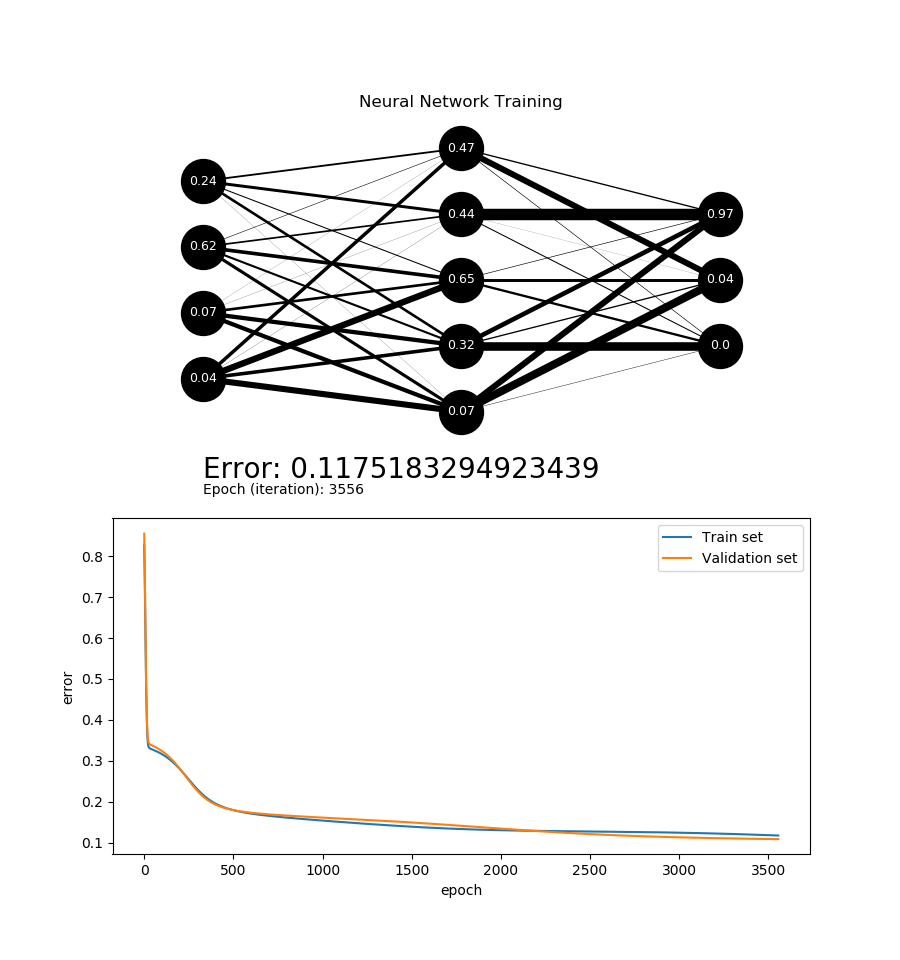

In [12]:
neural.train()   

In [13]:
neural.test()

salah:  8
benar:  40
akurasi:  0.8333333333333334
number of iterations:  3556
